In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
url = 'MoneyHeist.csv'
data = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset
print(data.head())

         Date  Season  Episode                 Title  \
0  2017-05-02       1        1  Efectuar lo acordado   
1  2017-05-09       1        2  Imprudencias letales   
2  2017-05-16       1        3     Errar al disparar   
3  2017-05-23       1        4      Caballo de Troya   
4  2017-05-30       1        5  El día de la marmota   

              Title(English)  \
0  Carry out what was agreed   
1        Lethal recklessness   
2              Miss shooting   
3                 Troy Horse   
4          The Groundhog Day   

                                         Description  Rate  RateNumber  
0  The Professor recruits a young female robber a...   8.3        7542  
1  Hostage negotiator Raquel makes initial contac...   8.4        6480  
2  Police grab an image of the face of one of the...   8.2        6046  
3  Raquel is adversely affected by a personal cri...   8.3        5776  
4  A sudden development in the investigation and ...   8.4        5541  


In [4]:
# Data Preprocessing
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Extract features from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [6]:
# Drop unnecessary columns
data.drop(columns=['Date', 'Title', 'Title(English)', 'Description'], inplace=True)

In [7]:
# Check for missing values
print(data.isnull().sum())

Season        0
Episode       0
Rate          0
RateNumber    0
Year          0
Month         0
dtype: int64


In [8]:
# Encode categorical variables if necessary (e.g., Season)
data = pd.get_dummies(data, columns=['Season'], drop_first=True)

In [9]:
# Define features and target variable
X = data.drop('Rate', axis=1)  # Features
y = data['Rate']                # Target variable

In [10]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.16624899999999884
R^2 Score: 0.5864872588832514


In [15]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

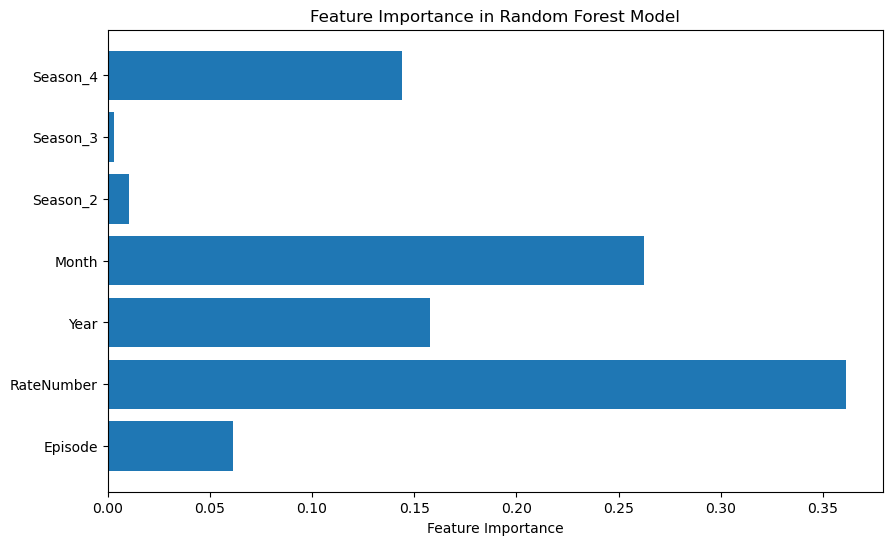

In [16]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()